# 1.Check eligibility of the Customer given the inputs described above.

# Read training data

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
A = pd.read_csv("E:/Data Science/NN Mini Project/training_set.csv")

In [3]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
A.shape

(614, 13)

# Missing Data Treatment

In [5]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
from ann1 import replacer
replacer(A)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.00000,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.00000,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.00000,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.00000,0.0,187.000000,360.0,1.0,Urban,Y


In [7]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
A[["Loan_ID"]].value_counts()

Loan_ID 
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Length: 614, dtype: int64

In [9]:
A = A.drop(labels=["Loan_ID"],axis=1)

In [10]:
A.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y


# Remove special Characters

In [11]:
A[["Dependents"]].value_counts()

Dependents
0             360
1             102
2             101
3+             51
dtype: int64

In [12]:
a = []
for i in A["Dependents"]:
    a.append(i.replace("+",""))

In [13]:
b=0
for i in a:
    A.iloc[b,2] = i
    b = b+1

In [14]:
A[["Dependents"]]

,Dependents
0,0
1,1
2,0
3,0
4,0
...,...
609,0
610,3
611,1
612,2


In [15]:
train_data = A

# Declare X and Y column

In [16]:
X = train_data.drop(labels=["Loan_Status"],axis=1)
Y = train_data[["Loan_Status"]]

# EDA (Univariant,Bivariant)

# a)Univariant

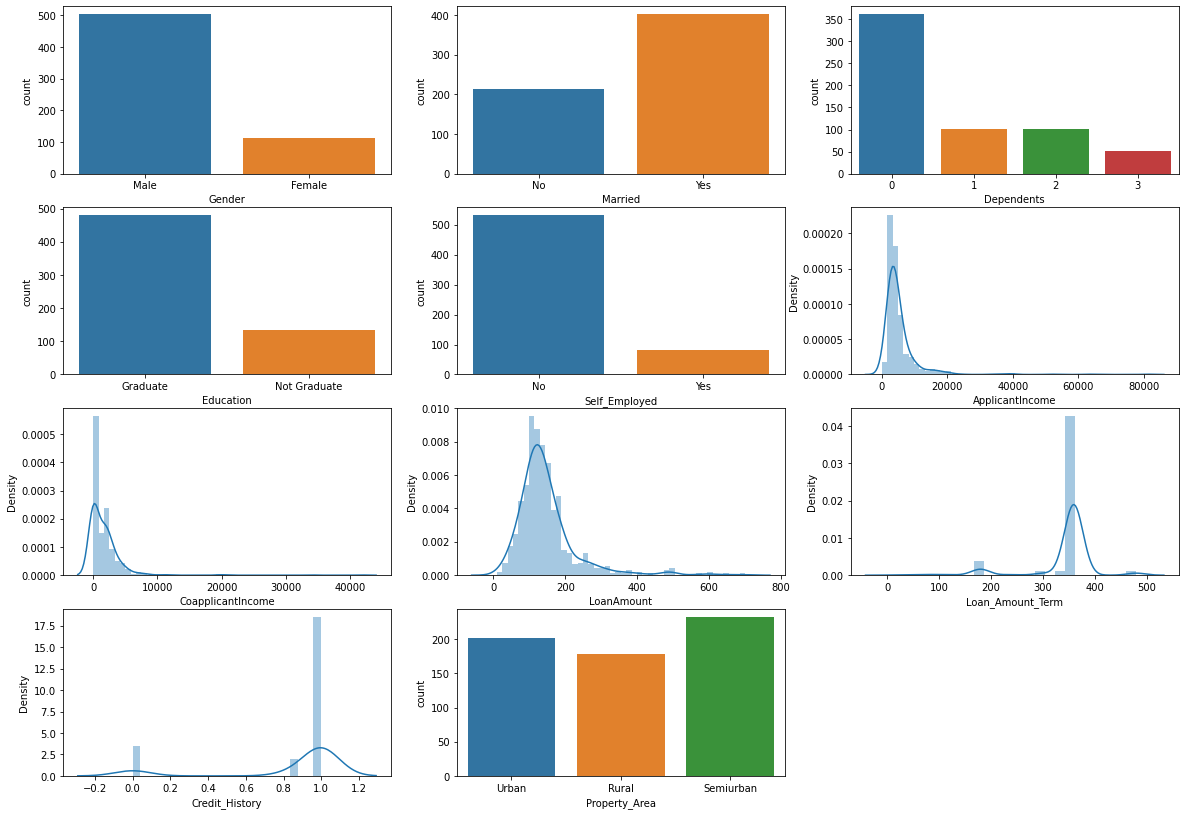

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,40))
q = 1
import seaborn as sb
for i in X.columns:
    if(X[i].dtypes == "object"):
        plt.subplot(11,3,q)
        sb.countplot(X[i])
        q = q + 1
    else:
        plt.subplot(11,3,q)
        sb.distplot(X[i])
        q = q + 1

# b)Bivariant

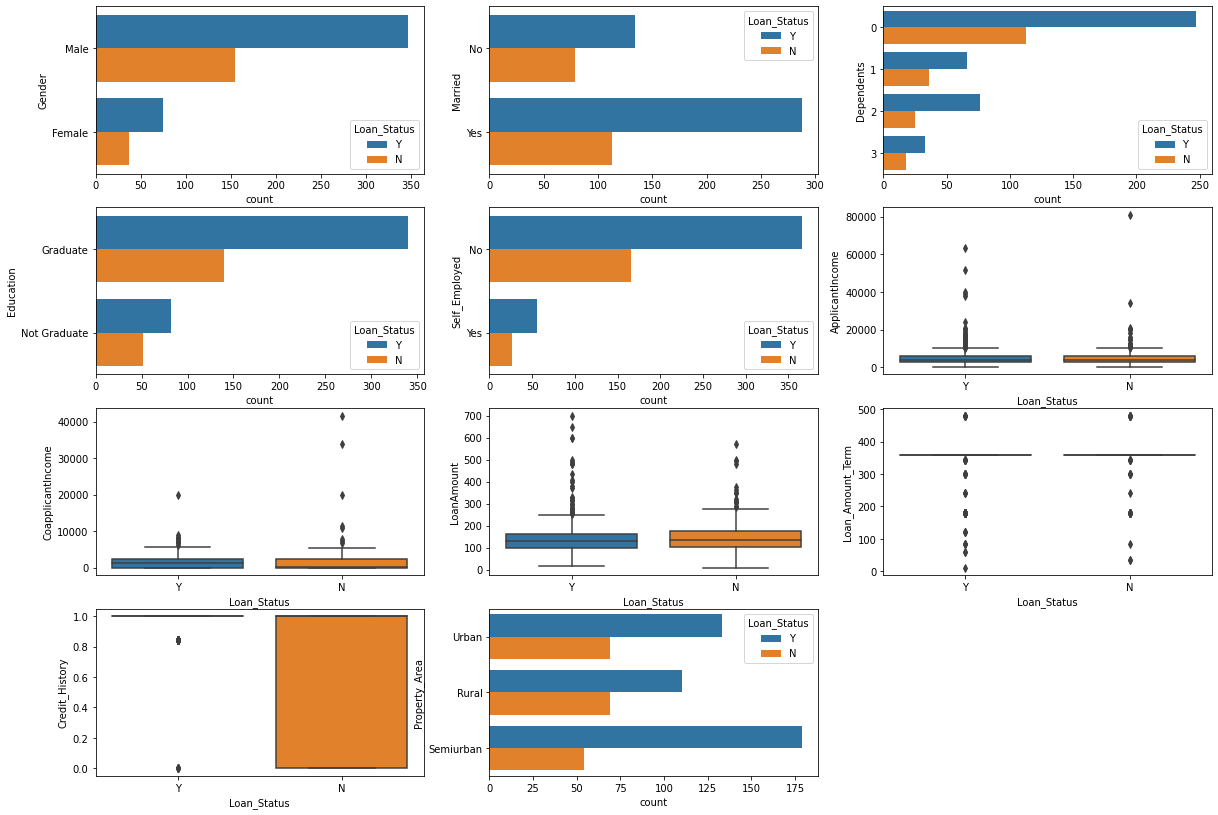

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,40))
q = 1
import seaborn as sb
for i in X.columns:
    if(X[i].dtypes == "object"):
        plt.subplot(11,3,q)
        sb.countplot(y=X[i],hue=Y.Loan_Status)
        q = q + 1
    else:
        plt.subplot(11,3,q)
        sb.boxplot(Y.Loan_Status,X[i])
        q = q + 1

# Seperating cat and con of X

In [19]:
def cat_con_sep(df):
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)
    
    return cat, con

In [20]:
cat, con = cat_con_sep(X)

In [21]:
X[cat]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural
610,Male,Yes,3,Graduate,No,Rural
611,Male,Yes,1,Graduate,No,Urban
612,Male,Yes,2,Graduate,No,Urban


In [22]:
X[con]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.00000,0.0,146.412162,360.0,1.0
1,5405.54085,1508.0,128.000000,360.0,1.0
2,3000.00000,0.0,66.000000,360.0,1.0
3,2583.00000,2358.0,120.000000,360.0,1.0
4,6000.00000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900.00000,0.0,71.000000,360.0,1.0
610,4106.00000,0.0,40.000000,180.0,1.0
611,8072.00000,240.0,253.000000,360.0,1.0
612,7583.00000,0.0,187.000000,360.0,1.0


# Removing skewness

In [23]:
X[con].skew()

ApplicantIncome      6.538870
CoapplicantIncome    7.492000
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [24]:
from numpy import log, sqrt
X.CoapplicantIncome = sqrt(X.CoapplicantIncome)
X.ApplicantIncome = log(X.ApplicantIncome)
X.LoanAmount = log(X.LoanAmount)
X[con].skew()

ApplicantIncome      0.477562
CoapplicantIncome    0.980113
LoanAmount          -0.223227
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

# Preprocessing function

In [25]:
from sklearn.preprocessing import StandardScaler
def preprocessing_data(df,cat,con):
    ss = StandardScaler()
    df1 = pd.get_dummies(df[cat])
    df2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    df3 = df2.join(df1)
    return df3

# Preprocessing of X

In [26]:
X = preprocessing_data(X,cat,con)

In [27]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.515465,-0.968030,0.250640,0.279851,0.451640,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.393196,0.374420,-0.020226,0.279851,0.451640,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.519896,-0.968030,-1.355202,0.279851,0.451640,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.751980,0.710655,-0.150299,0.279851,0.451640,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.554992,-0.968030,0.174727,0.279851,0.451640,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.572468,-0.968030,-1.208025,0.279851,0.451640,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,-0.033218,-0.968030,-2.364484,-2.518655,0.451640,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,1.015004,-0.432476,1.353011,0.279851,0.451640,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,0.918095,-0.968030,0.743783,0.279851,0.451640,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


# Encoding of Y

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = pd.DataFrame(le.fit_transform(Y),columns=Y.columns)

In [29]:
Y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


# Divide X and Y into train and test data

In [30]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=32,test_size=0.2)

# Find best param using Keras Tunner

In [31]:
from keras import Sequential
from keras.layers import Dense, Dropout
import keras_tuner as kt
import tensorflow as tf

In [32]:
def model_maker_func(hp):
    model = Sequential()
    model.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))
    HLS = hp.Int("units", min_value=32, max_value=257, step=32)
    model.add(Dense(units=HLS))
    DROPOUT_LAYER_RATE = hp.Choice("rate",values=[0.1,0.15,0.2,0.25,0.3,0.35,0.4])
    model.add(Dropout(rate=DROPOUT_LAYER_RATE))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss="binary_crossentropy",metrics="accuracy")
    
    return model

In [33]:
import os
os.chdir("E:/Data Science/Dummy/")

In [34]:
tuner = kt.Hyperband(model_maker_func,
                     objective='val_accuracy',
                     max_epochs=10,
                     directory="nn1LP_1",
                     project_name="nnlp1")

INFO:tensorflow:Reloading Oracle from existing project nn1LP_1\nnlp1\oracle.json
INFO:tensorflow:Reloading Tuner from nn1LP_1\nnlp1\tuner0.json


In [35]:
tuner.search(xtrain,ytrain,validation_split=0.2)

INFO:tensorflow:Oracle triggered exit


In [36]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("rate")

0.3

In [37]:
tuner.get_best_hyperparameters(num_trials=1)[0].get("units")

192

# Create neural network using best params

In [38]:
nn1 = Sequential()
nn1.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))
nn1.add(Dense(32))
nn1.add(Dropout(0.2))
nn1.add(Dense(1,activation="sigmoid"))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=40,monitor="accuracy")

nn1.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])
nn1.fit(xtrain,ytrain,validation_split=0.2,callbacks=es,epochs=500)

Epoch 1/500
13/13 [==============================] - 1s 40ms/step - loss: 0.6252 - accuracy: 0.6709 - val_loss: 0.5195 - val_accuracy: 0.7778
Epoch 2/500
13/13 [==============================] - 0s 4ms/step - loss: 0.5121 - accuracy: 0.7959 - val_loss: 0.4585 - val_accuracy: 0.8384
Epoch 3/500
13/13 [==============================] - 0s 6ms/step - loss: 0.4778 - accuracy: 0.8087 - val_loss: 0.4393 - val_accuracy: 0.8384
Epoch 4/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4611 - accuracy: 0.8112 - val_loss: 0.4389 - val_accuracy: 0.8384
Epoch 5/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4327 - accuracy: 0.8112 - val_loss: 0.4448 - val_accuracy: 0.8384
Epoch 6/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4447 - accuracy: 0.8112 - val_loss: 0.4487 - val_accuracy: 0.8283
Epoch 7/500
13/13 [==============================] - 0s 4ms/step - loss: 0.4331 - accuracy: 0.8036 - val_loss: 0.4619 - val_accuracy: 0.8081
Epoch 8/500


Epoch 56/500
13/13 [==============================] - 0s 4ms/step - loss: 0.1962 - accuracy: 0.9260 - val_loss: 0.6541 - val_accuracy: 0.7778
Epoch 57/500
13/13 [==============================] - 0s 4ms/step - loss: 0.1920 - accuracy: 0.9311 - val_loss: 0.6683 - val_accuracy: 0.7778
Epoch 58/500
13/13 [==============================] - 0s 4ms/step - loss: 0.1989 - accuracy: 0.9260 - val_loss: 0.6815 - val_accuracy: 0.7576
Epoch 59/500
13/13 [==============================] - 0s 4ms/step - loss: 0.1848 - accuracy: 0.9388 - val_loss: 0.6885 - val_accuracy: 0.7879
Epoch 60/500
13/13 [==============================] - 0s 4ms/step - loss: 0.1887 - accuracy: 0.9286 - val_loss: 0.6730 - val_accuracy: 0.7778
Epoch 61/500
13/13 [==============================] - 0s 4ms/step - loss: 0.1766 - accuracy: 0.9337 - val_loss: 0.6950 - val_accuracy: 0.7677
Epoch 62/500
13/13 [==============================] - 0s 4ms/step - loss: 0.1823 - accuracy: 0.9413 - val_loss: 0.7010 - val_accuracy: 0.7778
Epoch 

13/13 [==============================] - 0s 4ms/step - loss: 0.0743 - accuracy: 0.9745 - val_loss: 1.0982 - val_accuracy: 0.7475
Epoch 114/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0701 - accuracy: 0.9796 - val_loss: 1.1204 - val_accuracy: 0.7980
Epoch 115/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0650 - accuracy: 0.9719 - val_loss: 1.1269 - val_accuracy: 0.7576
Epoch 116/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0704 - accuracy: 0.9745 - val_loss: 1.1459 - val_accuracy: 0.7879
Epoch 117/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0636 - accuracy: 0.9796 - val_loss: 1.1418 - val_accuracy: 0.7475
Epoch 118/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0647 - accuracy: 0.9796 - val_loss: 1.1613 - val_accuracy: 0.7778
Epoch 119/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0614 - accuracy: 0.9796 - val_loss: 1.1450 - val_accuracy: 0.7576
Epoch 120/500

13/13 [==============================] - 0s 4ms/step - loss: 0.0392 - accuracy: 0.9847 - val_loss: 1.4901 - val_accuracy: 0.7172
Epoch 171/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0400 - accuracy: 0.9847 - val_loss: 1.4707 - val_accuracy: 0.7273
Epoch 172/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0378 - accuracy: 0.9847 - val_loss: 1.4559 - val_accuracy: 0.7677
Epoch 173/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0359 - accuracy: 0.9872 - val_loss: 1.5225 - val_accuracy: 0.7475
Epoch 174/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0372 - accuracy: 0.9847 - val_loss: 1.4971 - val_accuracy: 0.7273
Epoch 175/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0378 - accuracy: 0.9847 - val_loss: 1.5329 - val_accuracy: 0.7677
Epoch 176/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0376 - accuracy: 0.9821 - val_loss: 1.5402 - val_accuracy: 0.7172
Epoch 177/500

In [39]:
nn1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               2688      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 6,849
Trainable params: 6,849
Non-trainable params: 0
_________________________________________________________________


# Prepare Testing data in same format as Training data for making predictions

In [40]:
B = pd.read_csv("E:/Data Science/NN Mini Project/testing_set.csv")

In [41]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [42]:
B.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [43]:
replacer(B)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.825444,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural


In [44]:
dep_fil = []
for i in B.Dependents:
    i = i.replace("+","")
    dep_fil.append(i)

In [45]:
B.Dependents = dep_fil

In [46]:
B.Dependents.value_counts()

0    210
2     59
1     58
3     40
Name: Dependents, dtype: int64

In [47]:
B = B.drop(labels=["Loan_ID"],axis=1)

In [48]:
test_data = B

In [49]:
cat, con = cat_con_sep(test_data)

In [50]:
test_data = preprocessing_data(test_data,cat,con)

In [51]:
test_data.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.186461,-0.673335,-0.429368,0.270603,0.47918,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,-0.352692,-0.029848,-0.166482,0.270603,0.47918,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.039641,0.098849,1.180807,0.270603,0.47918,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [52]:
pred_test_data = nn1.predict(test_data)

In [53]:
raw = []
import numpy as np
for i in pred_test_data:
        raw.append(int(np.round(i)))

In [54]:
raw = le.inverse_transform(raw)

In [55]:
B["Loan_Status"] = raw

In [56]:
B.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.825444,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,N


# 2. Identify customer segments from given data and categorize customer into one of the segments.

In [57]:
clust_train = A.drop(labels=["LoanAmount","Loan_Amount_Term","Loan_Status"],axis=1)

# Data Preprocessing

In [58]:
cat, con = cat_con_sep(clust_train)

In [59]:
clust_train = preprocessing_data(clust_train,cat,con)

# Applying for loop and making Elbow curve for getting best K cluster value

In [60]:
from sklearn.cluster import KMeans

WCSS = []
K = range(2,20,1)
for i in K:
    km_ser = KMeans(n_clusters=i)
    model_ser = km_ser.fit(clust_train)
    WCSS.append(model_ser.inertia_)

In [61]:
WCSS

[2820.267473250377,
 2465.5670268057333,
 2168.5895548026674,
 1819.4129385625274,
 1697.4919326538125,
 1606.0967370725923,
 1498.6808318571043,
 1446.1341581554127,
 1372.0740282217507,
 1295.1261695322573,
 1279.9882372658537,
 1220.5215200627308,
 1183.1070797591897,
 1156.6223298780837,
 1101.9953688528155,
 1066.9352106642327,
 1066.7161587774233,
 1038.3736404055635]

Text(0.5, 1.0, 'Elbow curve Data')

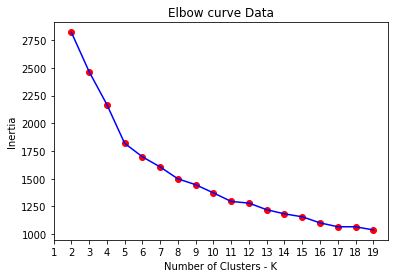

In [62]:
import matplotlib.pyplot as plt

plt.scatter(K,WCSS,c="red")
plt.plot(K,WCSS,c="blue")
plt.xlabel("Number of Clusters - K")
plt.ylabel("Inertia")
plt.xticks(range(1,20,1))
plt.title("Elbow curve Data")

# Create model with best K value

In [63]:
km = KMeans(n_clusters=5)
model_clust = km.fit(clust_train) 

# Prepare test data as same as train data

In [64]:
test_data_clst = B.drop(labels=["LoanAmount","Loan_Amount_Term","Loan_Status"],axis=1)

In [65]:
cat, con  = cat_con_sep(test_data_clst)

In [66]:
test_data_clst = preprocessing_data(test_data_clst,cat,con)

# Predict clusters of data

In [67]:
cluster = model_clust.predict(test_data_clst)

In [68]:
cluster

array([0, 0, 0, 0, 4, 0, 4, 2, 0, 4, 4, 0, 4, 2, 4, 4, 0, 0, 0, 4, 0, 4,
       4, 4, 0, 3, 0, 0, 0, 4, 4, 0, 4, 0, 0, 2, 0, 0, 4, 4, 0, 4, 0, 4,
       4, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 2, 4, 0, 2, 0, 0, 0, 4, 2, 0, 0,
       2, 2, 0, 2, 4, 4, 0, 0, 0, 4, 0, 4, 0, 0, 2, 1, 2, 0, 2, 0, 0, 4,
       4, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 2, 0, 0, 4, 0, 2, 0, 0, 0,
       4, 0, 4, 0, 0, 4, 4, 2, 2, 2, 4, 0, 0, 2, 2, 4, 2, 0, 4, 0, 0, 4,
       0, 4, 4, 0, 0, 0, 4, 4, 2, 0, 2, 1, 0, 4, 4, 2, 0, 4, 4, 0, 4, 2,
       0, 4, 0, 0, 4, 0, 4, 2, 4, 4, 4, 2, 2, 0, 2, 0, 4, 0, 0, 2, 2, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 2, 0, 4, 2, 0,
       2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4, 4, 2, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 2, 4, 0, 0, 4, 2, 3, 4, 0, 4, 0, 2, 2, 3, 0, 4, 4, 2,
       0, 2, 4, 2, 0, 0, 0, 4, 2, 0, 4, 0, 0, 2, 0, 0, 0, 4, 0, 0, 4, 0,
       0, 4, 2, 4, 2, 4, 0, 4, 1, 2, 2, 0, 0, 4, 2, 1, 4, 0, 4, 4, 0, 0,
       0, 4, 4, 0, 0, 0, 4, 2, 0, 0, 4, 4, 0, 0, 0,

In [69]:
E = B.drop(labels=["LoanAmount","Loan_Amount_Term","Loan_Status"],axis=1)

In [70]:
E["Cluster"] = cluster

In [71]:
E.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Cluster
0,Male,Yes,0,Graduate,No,5720,0,1.000000,Urban,0
1,Male,Yes,1,Graduate,No,3076,1500,1.000000,Urban,0
2,Male,Yes,2,Graduate,No,5000,1800,1.000000,Urban,0
3,Male,Yes,2,Graduate,No,2340,2546,0.825444,Urban,0
4,Male,No,0,Not Graduate,No,3276,0,1.000000,Urban,4


In [72]:
E.groupby(by="Cluster")["Cluster"].count()

Cluster
0    195
1      4
2     58
3      4
4    106
Name: Cluster, dtype: int64

In [73]:
cls_name = { 
    0:"Good Credit History",
    1:"Good Income and Credit history",
    2:"Bad Credit History",
    3:"Highest Coapplicant Income",
    4:"Highest Applicant Income"
}

In [74]:
tag_clu = []
for i in E.Cluster:
    tag_clu.append(cls_name[i])
    
E["Customer Segmentation"] = tag_clu

In [75]:
E.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Cluster,Customer Segmentation
0,Male,Yes,0,Graduate,No,5720,0,1.000000,Urban,0,Good Credit History
1,Male,Yes,1,Graduate,No,3076,1500,1.000000,Urban,0,Good Credit History
2,Male,Yes,2,Graduate,No,5000,1800,1.000000,Urban,0,Good Credit History
3,Male,Yes,2,Graduate,No,2340,2546,0.825444,Urban,0,Good Credit History
4,Male,No,0,Not Graduate,No,3276,0,1.000000,Urban,4,Highest Applicant Income


# 3. If customer is not eligible for the input required amount and duration:

# a. What can be amount for the given duration.

# Get data which have Loan_Status is yes

In [76]:
train_data1 = A[A["Loan_Status"]=="Y"]

# Indexing properly

In [77]:
len_train_data1 = train_data1.shape[0]
train_data1.index = range(0,len_train_data1,1)

# Removing unwanted columns

In [78]:
train_data1 = train_data1.drop(labels="Loan_Status",axis=1)

# Decrale X and Y

In [79]:
X = train_data1.drop(labels=["LoanAmount"],axis=1)
Y = train_data1[["LoanAmount"]]

# Data Preprocessing

In [80]:
cat, con = cat_con_sep(X)

In [81]:
X[con].skew()

ApplicantIncome      5.500304
CoapplicantIncome    3.042653
Loan_Amount_Term    -2.619580
Credit_History      -6.430558
dtype: float64

In [82]:
X["CoapplicantIncome"] = sqrt(X["CoapplicantIncome"])
X["ApplicantIncome"] = sqrt(X["ApplicantIncome"])

In [83]:
X[con].skew()

ApplicantIncome      2.768685
CoapplicantIncome    0.351333
Loan_Amount_Term    -2.619580
Credit_History      -6.430558
dtype: float64

In [84]:
X = preprocessing_data(X,cat,con)

In [85]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,random_state=32,test_size=0.2)

# Find best params using keras tunner

In [86]:
def model_builder2(hp):
    
    tuning_grid = [0.1,0.13,0.15,0.2,0.23,0.25,0.3,0.33,0.35,0.4,0.43,0.45]
    model = Sequential()
    model.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))
    
    HLS1 = hp.Int("units1", min_value=32, max_value=400, step=10)
    model.add(Dense(units=HLS1,activation="relu"))
    
    DROPOUT_LAYER_RATE1 = hp.Choice("rate1",values= tuning_grid)
    model.add(Dropout(rate=DROPOUT_LAYER_RATE1))
    
    HLS2 = hp.Int("units2", min_value=32, max_value=400, step=10)
    model.add(Dense(units=HLS2,activation="relu"))
    
    DROPOUT_LAYER_RATE2 = hp.Choice("rate2",values=tuning_grid)
    model.add(Dropout(rate=DROPOUT_LAYER_RATE2))
    
    HLS3 = hp.Int("units3", min_value=32, max_value=400, step=50)
    model.add(Dense(units=HLS3,activation="relu"))
    
    DROPOUT_LAYER_RATE3 = hp.Choice("rate3",values=tuning_grid)
    model.add(Dropout(rate=DROPOUT_LAYER_RATE3))
    
    
    model.add(Dense(1,activation="relu"))
    
    model.compile(loss="MeanAbsoluteError",metrics="mae")
    
    return model

In [87]:
import os
os.chdir("E:/Data Science/Dummy/")

In [88]:
tuner1 = kt.Hyperband(model_builder2,
                     objective='mae',
                     max_epochs=10,
                     directory="nn2lp_21",
                     project_name="nn2lp21")

INFO:tensorflow:Reloading Oracle from existing project nn2lp_21\nn2lp21\oracle.json
INFO:tensorflow:Reloading Tuner from nn2lp_21\nn2lp21\tuner0.json


In [89]:
tuner1.search(xtrain,ytrain,validation_split=0.2)

INFO:tensorflow:Oracle triggered exit


In [90]:
print("Hidden Layer 1: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("units1"))
print("Dropout Layer 1: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("rate1"))
print("Hidden Layer 2: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("units2"))
print("Dropout Layer 2: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("rate2"))
print("Hidden Layer 3: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("units3"))
print("Dropout Layer 3: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("rate3"))

Hidden Layer 1:  292
Dropout Layer 1:  0.15
Hidden Layer 2:  302
Dropout Layer 2:  0.1
Hidden Layer 3:  332
Dropout Layer 3:  0.4


# Create Neural Network using best param of tuner1

In [91]:
nn2 = Sequential()

nn2.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))

nn2.add(Dense(292,activation="relu"))
nn2.add(Dropout(0.15))
nn2.add(Dense(302,activation="relu"))
nn2.add(Dropout(0.1))
nn2.add(Dense(332,activation="relu"))
nn2.add(Dropout(0.4))


nn2.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=50,monitor="mae")

nn2.compile(optimizer="Adam",loss="MeanAbsoluteError",metrics=["mae"])
nn2.fit(xtrain,ytrain,validation_split=0.2,callbacks=es,epochs=600)

Epoch 1/600
9/9 [==============================] - 0s 42ms/step - loss: 144.3360 - mae: 144.3360 - val_loss: 144.3789 - val_mae: 144.3789
Epoch 2/600
9/9 [==============================] - 0s 11ms/step - loss: 126.0592 - mae: 126.0592 - val_loss: 94.9946 - val_mae: 94.9946
Epoch 3/600
9/9 [==============================] - 0s 10ms/step - loss: 64.7467 - mae: 64.7467 - val_loss: 58.6401 - val_mae: 58.6401
Epoch 4/600
9/9 [==============================] - 0s 10ms/step - loss: 54.9426 - mae: 54.9426 - val_loss: 54.4806 - val_mae: 54.4806
Epoch 5/600
9/9 [==============================] - 0s 8ms/step - loss: 48.3753 - mae: 48.3753 - val_loss: 44.9003 - val_mae: 44.9003
Epoch 6/600
9/9 [==============================] - 0s 10ms/step - loss: 42.1984 - mae: 42.1984 - val_loss: 45.1151 - val_mae: 45.1151
Epoch 7/600
9/9 [==============================] - 0s 10ms/step - loss: 40.0284 - mae: 40.0284 - val_loss: 41.9606 - val_mae: 41.9606
Epoch 8/600
9/9 [==============================] - 0s 10m

9/9 [==============================] - 0s 9ms/step - loss: 26.9737 - mae: 26.9737 - val_loss: 45.0289 - val_mae: 45.0289
Epoch 62/600
9/9 [==============================] - 0s 8ms/step - loss: 28.0417 - mae: 28.0417 - val_loss: 44.9740 - val_mae: 44.9740
Epoch 63/600
9/9 [==============================] - 0s 10ms/step - loss: 26.7655 - mae: 26.7655 - val_loss: 45.7964 - val_mae: 45.7964
Epoch 64/600
9/9 [==============================] - 0s 8ms/step - loss: 26.2456 - mae: 26.2456 - val_loss: 46.7543 - val_mae: 46.7543
Epoch 65/600
9/9 [==============================] - 0s 9ms/step - loss: 31.3664 - mae: 31.3664 - val_loss: 44.4939 - val_mae: 44.4939
Epoch 66/600
9/9 [==============================] - 0s 8ms/step - loss: 27.9473 - mae: 27.9473 - val_loss: 45.6379 - val_mae: 45.6379
Epoch 67/600
9/9 [==============================] - 0s 8ms/step - loss: 25.9444 - mae: 25.9444 - val_loss: 45.0657 - val_mae: 45.0657
Epoch 68/600
9/9 [==============================] - 0s 10ms/step - loss: 2

Epoch 122/600
9/9 [==============================] - 0s 9ms/step - loss: 19.8870 - mae: 19.8870 - val_loss: 49.6660 - val_mae: 49.6660
Epoch 123/600
9/9 [==============================] - 0s 9ms/step - loss: 19.0908 - mae: 19.0908 - val_loss: 47.4666 - val_mae: 47.4666
Epoch 124/600
9/9 [==============================] - 0s 9ms/step - loss: 20.6686 - mae: 20.6686 - val_loss: 49.5732 - val_mae: 49.5732
Epoch 125/600
9/9 [==============================] - 0s 8ms/step - loss: 21.0433 - mae: 21.0433 - val_loss: 49.5293 - val_mae: 49.5293
Epoch 126/600
9/9 [==============================] - 0s 8ms/step - loss: 22.4159 - mae: 22.4159 - val_loss: 50.0126 - val_mae: 50.0126
Epoch 127/600
9/9 [==============================] - 0s 8ms/step - loss: 21.6924 - mae: 21.6924 - val_loss: 51.4808 - val_mae: 51.4808
Epoch 128/600
9/9 [==============================] - 0s 11ms/step - loss: 21.7540 - mae: 21.7540 - val_loss: 49.1200 - val_mae: 49.1200
Epoch 129/600
9/9 [==============================] - 0

9/9 [==============================] - 0s 9ms/step - loss: 21.5093 - mae: 21.5093 - val_loss: 49.7855 - val_mae: 49.7855
Epoch 183/600
9/9 [==============================] - 0s 8ms/step - loss: 18.6616 - mae: 18.6616 - val_loss: 49.7594 - val_mae: 49.7594
Epoch 184/600
9/9 [==============================] - 0s 10ms/step - loss: 20.6289 - mae: 20.6289 - val_loss: 49.4418 - val_mae: 49.4418
Epoch 185/600
9/9 [==============================] - 0s 9ms/step - loss: 20.9186 - mae: 20.9186 - val_loss: 47.9547 - val_mae: 47.9547
Epoch 186/600
9/9 [==============================] - 0s 9ms/step - loss: 18.7532 - mae: 18.7532 - val_loss: 51.1739 - val_mae: 51.1739
Epoch 187/600
9/9 [==============================] - 0s 8ms/step - loss: 18.8921 - mae: 18.8921 - val_loss: 50.2787 - val_mae: 50.2787
Epoch 188/600
9/9 [==============================] - 0s 9ms/step - loss: 18.8701 - mae: 18.8701 - val_loss: 49.8501 - val_mae: 49.8501
Epoch 189/600
9/9 [==============================] - 0s 9ms/step - l

9/9 [==============================] - 0s 9ms/step - loss: 18.0819 - mae: 18.0819 - val_loss: 50.6406 - val_mae: 50.6406
Epoch 243/600
9/9 [==============================] - 0s 9ms/step - loss: 15.9165 - mae: 15.9165 - val_loss: 50.4858 - val_mae: 50.4858
Epoch 244/600
9/9 [==============================] - 0s 9ms/step - loss: 17.4533 - mae: 17.4533 - val_loss: 51.2639 - val_mae: 51.2639
Epoch 245/600
9/9 [==============================] - 0s 9ms/step - loss: 18.4284 - mae: 18.4284 - val_loss: 49.5511 - val_mae: 49.5511
Epoch 246/600
9/9 [==============================] - 0s 8ms/step - loss: 17.7787 - mae: 17.7787 - val_loss: 51.0983 - val_mae: 51.0983
Epoch 247/600
9/9 [==============================] - 0s 10ms/step - loss: 16.9609 - mae: 16.9609 - val_loss: 50.8006 - val_mae: 50.8006
Epoch 248/600
9/9 [==============================] - 0s 10ms/step - loss: 18.1851 - mae: 18.1851 - val_loss: 50.5002 - val_mae: 50.5002
Epoch 249/600
9/9 [==============================] - 0s 9ms/step - 

# Prepare  test data same as training data

In [92]:
test_data2 = B[B["Loan_Status"]=='N']
test_data2_len = test_data2.shape[0]
test_data2.index = range(0,test_data2_len,1)

In [93]:
test_data2 = test_data2.drop(labels=["LoanAmount","Loan_Status"],axis=1)

In [94]:
cat, con = cat_con_sep(test_data2)

In [95]:
test_data2 = preprocessing_data(test_data2,cat,con)

In [96]:
predicted_nn2 = nn2.predict(test_data2)

In [97]:
predicted_nn2[0]

array([56.565796], dtype=float32)

In [98]:
import numpy as np
pred_la = []
for i in predicted_nn2:
    pred_la.append(round(i[0]))

In [99]:
C = B[B["Loan_Status"]=="N"]
len_C = C.shape[0]
C.index = range(0,len_C,1)

In [100]:
C = C.drop(labels=["LoanAmount","Loan_Status"],axis=1)

In [101]:
C["LoanAmount"] = pred_la

In [102]:
C.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount
0,Male,No,0,Not Graduate,No,3276,0,360.0,1.0,Urban,57
1,Male,Yes,2,Not Graduate,No,3881,0,360.0,0.0,Rural,89
2,Male,No,0,Not Graduate,No,3091,0,360.0,1.0,Urban,54
3,Male,No,1,Graduate,No,5667,0,360.0,1.0,Urban,115
4,Male,No,0,Graduate,No,0,24000,360.0,0.0,Rural,127


# b. If duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?

In [103]:
train_data2 = A[(A["Loan_Status"]=="Y") & (A["Loan_Amount_Term"]>240.0)]

# Indexing

In [104]:
len_train_data2 = train_data2.shape[0]
train_data2.index = range(0,len_train_data2,1)

# Drop Unnecessary Columns

In [105]:
train_data2 = train_data2.drop(labels=["Loan_Status"],axis=1)

In [106]:
X = train_data2.drop(labels=["Loan_Amount_Term"],axis=1)
Y = train_data2[["Loan_Amount_Term"]]

# Convert Dependents columns into continuous

In [107]:
dep1 = []
for i in X.Dependents:
    dep1.append(int(i))

X["Dependents"] = dep1

In [108]:
loan_term = []
for i in Y.Loan_Amount_Term:
    loan_term.append(int(i))
    
Y["Loan_Amount_Term"] = loan_term

# Data Preprocessing

In [109]:
cat, con = cat_con_sep(X)

In [110]:
X[con].skew()

Dependents           1.018780
ApplicantIncome      4.759015
CoapplicantIncome    3.163921
LoanAmount           3.026629
Credit_History      -6.974311
dtype: float64

In [111]:
X.ApplicantIncome = log(X.ApplicantIncome)
X.CoapplicantIncome = sqrt(X.CoapplicantIncome)
X.LoanAmount = log(X.LoanAmount)
X.Dependents = sqrt(X.Dependents)

In [112]:
X[con].skew()

Dependents           0.608876
ApplicantIncome      0.532392
CoapplicantIncome    0.303109
LoanAmount           0.151097
Credit_History      -6.974311
dtype: float64

In [113]:
cat.remove("Property_Area")

In [114]:
cat

['Gender', 'Married', 'Education', 'Self_Employed']

In [115]:
lb1 = LabelEncoder()
ss1 = StandardScaler()
X1 = pd.DataFrame(lb1.fit_transform(X["Gender"]),columns=["Gender"])
X2 = pd.DataFrame(lb1.fit_transform(X["Property_Area"]),columns=["Property_Area"])
X3 = X1.join(X2)
X4 = pd.DataFrame(lb1.fit_transform(X["Married"]),columns=["Married"])
X5 = pd.DataFrame(lb1.fit_transform(X["Education"]),columns=["Education"])
X6 = X4.join(X5)
X7 = pd.DataFrame(lb1.fit_transform(X["Self_Employed"]),columns=["Self_Employed"])
X8 = X6.join(X7)
X9 = X8.join(X3)
X10 = pd.DataFrame(ss1.fit_transform(X[con]),columns=con)
X = X10.join(X9)

In [116]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Married,Education,Self_Employed,Gender,Property_Area
0,-0.787736,0.565930,-1.094153,0.262844,0.225112,0,0,0,1,2
1,-0.787736,-0.519547,-1.094153,-1.464058,0.225112,1,0,1,1,2
2,-0.787736,-0.762865,0.737107,-0.168321,0.225112,1,1,0,1,2
3,-0.787736,0.607370,-1.094153,0.181208,0.225112,0,0,0,1,2
4,1.327463,0.441185,1.348691,1.565053,0.225112,1,0,1,1,2


In [117]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=32)

# Finding best param for nn3

In [118]:
def model_builder3(hp):
    
    tuning_grid = [0.1,0.13,0.15,0.2,0.23,0.25,0.3,0.33,0.35,0.4,0.43,0.45]
    model = Sequential()
    model.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))
    
    HLS1 = hp.Int("units1", min_value=32, max_value=400, step=10)
    model.add(Dense(units=HLS1,activation="relu"))
    
    DROPOUT_LAYER_RATE1 = hp.Choice("rate1",values= tuning_grid)
    model.add(Dropout(rate=DROPOUT_LAYER_RATE1))
    
    HLS2 = hp.Int("units2", min_value=32, max_value=400, step=10)
    model.add(Dense(units=HLS2,activation="relu"))
    
    DROPOUT_LAYER_RATE2 = hp.Choice("rate2",values=tuning_grid)
    model.add(Dropout(rate=DROPOUT_LAYER_RATE2))
    
    HLS3 = hp.Int("units3", min_value=32, max_value=400, step=50)
    model.add(Dense(units=HLS3,activation="relu"))
    
    DROPOUT_LAYER_RATE3 = hp.Choice("rate3",values=tuning_grid)
    model.add(Dropout(rate=DROPOUT_LAYER_RATE3))
    
    
    model.add(Dense(1,activation="relu"))
    
    model.compile(loss="MeanAbsoluteError",metrics="mae")
    
    return model

In [119]:
import os
os.chdir("E:/Data Science/Dummy/")

In [120]:
tuner3 = kt.Hyperband(model_builder3,
                     objective='mae',
                     max_epochs=10,
                     directory="nn3lp_2",
                     project_name="nn3lp2")

INFO:tensorflow:Reloading Oracle from existing project nn3lp_2\nn3lp2\oracle.json
INFO:tensorflow:Reloading Tuner from nn3lp_2\nn3lp2\tuner0.json


In [121]:
tuner3.search(xtrain,ytrain,validation_split=0.2)

INFO:tensorflow:Oracle triggered exit


In [122]:
print("Hidden Layer 1: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("units1"))
print("Dropout Layer 1: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("rate1"))
print("Hidden Layer 2: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("units2"))
print("Dropout Layer 2: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("rate2"))
print("Hidden Layer 3: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("units3"))
print("Dropout Layer 3: ",tuner1.get_best_hyperparameters(num_trials=1)[0].get("rate3"))

Hidden Layer 1:  292
Dropout Layer 1:  0.15
Hidden Layer 2:  302
Dropout Layer 2:  0.1
Hidden Layer 3:  332
Dropout Layer 3:  0.4


In [123]:
nn3 = Sequential()

nn3.add(Dense(128,activation="relu",input_dim=len(xtrain.columns)))

nn3.add(Dense(292,activation="relu"))
nn3.add(Dropout(0.15))
nn3.add(Dense(302,activation="relu"))
nn3.add(Dropout(0.1))
nn3.add(Dense(332,activation="relu"))
nn3.add(Dropout(0.4))


nn3.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=50,monitor="mae")

nn3.compile(optimizer="Adam",loss="MeanAbsoluteError",metrics=["mae"])
nn3.fit(xtrain,ytrain,validation_split=0.2,callbacks=es,epochs=600)

Epoch 1/600
8/8 [==============================] - 0s 36ms/step - loss: 359.0188 - mae: 359.0188 - val_loss: 355.6805 - val_mae: 355.6805
Epoch 2/600
8/8 [==============================] - 0s 10ms/step - loss: 344.4517 - mae: 344.4517 - val_loss: 319.6060 - val_mae: 319.6060
Epoch 3/600
8/8 [==============================] - 0s 10ms/step - loss: 265.9396 - mae: 265.9396 - val_loss: 154.1285 - val_mae: 154.1285
Epoch 4/600
8/8 [==============================] - 0s 9ms/step - loss: 110.5344 - mae: 110.5344 - val_loss: 106.9278 - val_mae: 106.9278
Epoch 5/600
8/8 [==============================] - 0s 9ms/step - loss: 85.6783 - mae: 85.6783 - val_loss: 89.3367 - val_mae: 89.3367
Epoch 6/600
8/8 [==============================] - 0s 11ms/step - loss: 72.6176 - mae: 72.6176 - val_loss: 55.0678 - val_mae: 55.0678
Epoch 7/600
8/8 [==============================] - 0s 12ms/step - loss: 62.9263 - mae: 62.9263 - val_loss: 48.6307 - val_mae: 48.6307
Epoch 8/600
8/8 [==============================]

Epoch 62/600
8/8 [==============================] - 0s 9ms/step - loss: 32.3919 - mae: 32.3919 - val_loss: 22.2650 - val_mae: 22.2650
Epoch 63/600
8/8 [==============================] - 0s 9ms/step - loss: 26.5671 - mae: 26.5671 - val_loss: 18.7822 - val_mae: 18.7822
Epoch 64/600
8/8 [==============================] - 0s 9ms/step - loss: 26.6007 - mae: 26.6007 - val_loss: 20.2049 - val_mae: 20.2049
Epoch 65/600
8/8 [==============================] - 0s 9ms/step - loss: 30.0608 - mae: 30.0608 - val_loss: 25.5220 - val_mae: 25.5220
Epoch 66/600
8/8 [==============================] - 0s 10ms/step - loss: 30.6109 - mae: 30.6109 - val_loss: 22.1792 - val_mae: 22.1792
Epoch 67/600
8/8 [==============================] - 0s 9ms/step - loss: 30.9702 - mae: 30.9702 - val_loss: 24.9313 - val_mae: 24.9313
Epoch 68/600
8/8 [==============================] - 0s 8ms/step - loss: 28.3907 - mae: 28.3907 - val_loss: 18.4402 - val_mae: 18.4402
Epoch 69/600
8/8 [==============================] - 0s 9ms/st

Epoch 123/600
8/8 [==============================] - 0s 9ms/step - loss: 27.3024 - mae: 27.3024 - val_loss: 18.2681 - val_mae: 18.2681
Epoch 124/600
8/8 [==============================] - 0s 9ms/step - loss: 26.2023 - mae: 26.2023 - val_loss: 12.8853 - val_mae: 12.8853
Epoch 125/600
8/8 [==============================] - 0s 9ms/step - loss: 23.3471 - mae: 23.3471 - val_loss: 14.0307 - val_mae: 14.0307
Epoch 126/600
8/8 [==============================] - 0s 9ms/step - loss: 22.5705 - mae: 22.5705 - val_loss: 15.6020 - val_mae: 15.6020
Epoch 127/600
8/8 [==============================] - 0s 9ms/step - loss: 24.1924 - mae: 24.1924 - val_loss: 18.0660 - val_mae: 18.0660
Epoch 128/600
8/8 [==============================] - 0s 9ms/step - loss: 27.7060 - mae: 27.7060 - val_loss: 16.7903 - val_mae: 16.7903
Epoch 129/600
8/8 [==============================] - 0s 8ms/step - loss: 25.9471 - mae: 25.9471 - val_loss: 13.2293 - val_mae: 13.2293
Epoch 130/600
8/8 [==============================] - 0s

8/8 [==============================] - 0s 9ms/step - loss: 25.7028 - mae: 25.7028 - val_loss: 13.8741 - val_mae: 13.8741
Epoch 184/600
8/8 [==============================] - 0s 9ms/step - loss: 26.2418 - mae: 26.2418 - val_loss: 14.1024 - val_mae: 14.1024
Epoch 185/600
8/8 [==============================] - 0s 9ms/step - loss: 26.2949 - mae: 26.2949 - val_loss: 14.3496 - val_mae: 14.3496
Epoch 186/600
8/8 [==============================] - 0s 11ms/step - loss: 27.2028 - mae: 27.2028 - val_loss: 23.3285 - val_mae: 23.3285
Epoch 187/600
8/8 [==============================] - 0s 9ms/step - loss: 25.2202 - mae: 25.2202 - val_loss: 13.0831 - val_mae: 13.0831
Epoch 188/600
8/8 [==============================] - 0s 9ms/step - loss: 24.5241 - mae: 24.5241 - val_loss: 24.6519 - val_mae: 24.6519
Epoch 189/600
8/8 [==============================] - 0s 9ms/step - loss: 25.7916 - mae: 25.7916 - val_loss: 12.4313 - val_mae: 12.4313
Epoch 190/600
8/8 [==============================] - 0s 9ms/step - l

# Prepare Testing data for nn3

In [124]:
test_data3 = B[(B["Loan_Status"]=="N") & (B["Loan_Amount_Term"]<=240)]

# Indexing

In [125]:
len_test_data3 = test_data3.shape[0]
test_data3.index = range(0,len_test_data3,1)

# Delete unwanted columns

In [126]:
test_data3 = test_data3.drop(labels=["Loan_Status","Loan_Amount_Term"],axis=1)

# Convert Dependents columns type into continuous

In [127]:
test_dep = []
for i in test_data3.Dependents:
    test_dep.append(int(i))
    
test_data3["Dependents"] = test_dep

# Data Preprocessing

In [128]:
cat, con = cat_con_sep(test_data3)

In [129]:
cat.remove("Property_Area")
cat

['Gender', 'Married', 'Education', 'Self_Employed']

In [130]:
input1 = pd.DataFrame(lb1.fit_transform(X["Property_Area"]),columns=["Property_Area"])
input2 = pd.DataFrame(lb1.fit_transform(test_data3["Gender"]),columns=["Gender"])
out1 = input2.join(input1)
input3 = pd.DataFrame(lb1.fit_transform(test_data3["Self_Employed"]),columns=["Self_Employed"])
input4 = pd.DataFrame(lb1.fit_transform(test_data3["Education"]),columns=["Education"])
out2 = input4.join(input3)
input5 = pd.DataFrame(lb1.fit_transform(test_data3["Married"]),columns=["Married"])
out3 = input5.join(out2)
out4 = out3.join(out1)

x_con = pd.DataFrame(ss1.fit_transform(test_data3[con]),columns=con)

test_data3 = x_con.join(out4)

In [131]:
test_data3

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Married,Education,Self_Employed,Gender,Property_Area
0,-0.581238,1.273023,-1.686552,0.308981,-0.889441,1,0,0,0,2
1,0.464991,-0.140298,-0.021621,-1.486236,0.837849,0,0,0,0,2
2,-0.581238,-0.320840,0.312067,1.294590,-0.889441,0,0,0,0,2
3,-0.581238,-0.619897,0.040199,-0.148624,1.203119,1,1,0,0,2
4,-0.581238,-0.133653,0.522818,0.977787,-0.889441,1,0,0,0,2
5,-0.581238,-0.478122,0.010694,-0.958231,-0.889441,0,0,0,0,2
6,0.464991,-1.048546,0.670344,-1.239834,1.203119,1,0,1,0,2
7,-0.581238,-0.757242,1.707237,-0.007822,1.203119,1,0,1,0,2
8,2.557448,2.225576,-1.555184,1.259389,-0.889441,1,1,0,0,2


# Predicting Loan Amount Term

In [132]:
predicted_nn3 = nn3.predict(test_data3)

In [133]:
la_term = []
for i in predicted_nn3:
    la_term.append(round(i[0]))

In [134]:
la_term

[374, 364, 348, 354, 371, 322, 363, 352, 345]

In [135]:
D = B[(B["Loan_Status"]=="N") & (B["Loan_Amount_Term"]<=240)]

In [136]:
len_D = D.shape[0]
D.index = range(0,len_D,1)

In [137]:
D = D.drop(labels=["Loan_Amount_Term","Loan_Status"],axis=1)

In [138]:
D["Loan_Amount_Term"] = la_term

In [139]:
D

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Amount_Term
0,Male,Yes,0,Graduate,No,4456,0,131.0,0.000000,Semiurban,374
1,Male,No,1,Graduate,No,3180,2370,80.0,0.825444,Rural,364
2,Male,No,0,Graduate,No,3017,2845,159.0,0.000000,Urban,348
3,Male,Yes,0,Not Graduate,No,2747,2458,118.0,1.000000,Semiurban,354
4,Male,Yes,0,Graduate,No,3186,3145,150.0,0.000000,Semiurban,371
5,Male,No,0,Graduate,No,2875,2416,95.0,0.000000,Semiurban,322
6,Male,Yes,1,Graduate,Yes,2360,3355,87.0,1.000000,Rural,363
7,Male,Yes,0,Graduate,Yes,2623,4831,122.0,1.000000,Semiurban,352
8,Male,Yes,3,Not Graduate,No,5316,187,158.0,0.000000,Semiurban,345
